### Normalized species
Example model which calculates functions depending on the normalized values of a species which can be either in active state `SA` or inactive state `SI`.

The normalized values are `SA_f` and `SI_f`, respectively, with the total concentration of `S` given as 
```
ST = SA + SI
```
#### Model definition
The model is defined using `Tellurium` and `Antimony`. The identical equations could be typed directly in `COPASI`. 

The created model is exported as `SBML` which than can be used in `COPASI`.

In [1]:
%matplotlib inline
from __future__ import print_function, division
import tellurium as te
r = te.loada("""
    model normalized_species()
    
    # conversion between active (SA) and inactive (SI)
    J1: SA -> SI; k1*SA - k2*SI;
    k1 = 0.1; k2 = 0.02;
    
    # species
    species SA, SI, ST;
    SA = 10.0; SI = 0.0;
    const ST := SA + SI;
    
    SA is "active state S";
    SI is "inactive state S";
    ST is "total state S";
    
    # normalized species calculated via assignment rules
    species SA_f, SI_f;
    SA_f := SA/ST;
    SI_f := SI/ST;
    
    SA_f is "normalized active state S";
    SI_f is "normalized inactive state S";
    
    # parameters for your function
    P = 0.1;
    tau = 10.0;
    nA = 1.0;
    nI = 2.0;
    kA = 0.1;
    kI = 0.2;
    # now just use the normalized species in some math
    F := ( (1-(SI_f^nI)/(kI^nI+SI_f^nI)*(kI^nI+1) ) * ( (SA_f^nA)/(kA^nA+SA_f^nA)*(kA^nA+1) ) -P)*tau;

    end
""")
# print(r.getAntimony())

# Store the SBML for COPASI
import os
import tempfile
temp_dir = tempfile.mkdtemp()
file_path = os.path.join(temp_dir, 'normalizedSpecies.xml')
r.exportToSBML(file_path)

#### Model simulation
We perform a simple model simulation to demonstrate the main features using `roadrunner`:
- normalized values `SA_f` and `SI_f` are normalized in `[0,1]`
- the normalized values have same dynamics like `SA` and `SF`
- the normalized values can be used to calculates some dependent function, here `F`

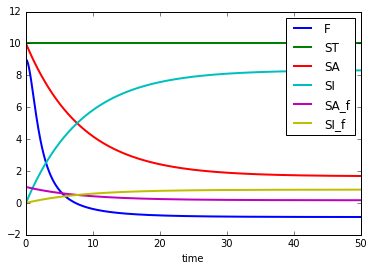

In [2]:
%matplotlib inline
r.reset()
# select the variables of interest in output
r.selections = ['time', 'F'] + r.getBoundarySpeciesIds() \
                             + r.getFloatingSpeciesIds()
# simulate from 0 to 50 with 1001 points
s = r.simulate(0,50,1001)
# plot the results
r.plot(s);